# Song identification

### Imports

In [2]:
from glob import glob

import os
import librosa
import librosa.display
import IPython.display as ipd

import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import seaborn as sns

# Style des figures
sns.set_theme(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

### Reading in Audio files

In [3]:
print(os.getcwd())

/home/max/Bureau/bird_id/lib


In [7]:
audio_files = glob("../birdsong-recognition/*") # jdd
print(len(audio_files)) # nombre d'enregistrements


5


In [8]:
ipd.Audio(audio_files[0]) #listen to the audio

The <font color='red'>audio sample rate </font>is a measurement of the samples per second taken by the system from a continuous digital signal

In [10]:
y, sr = librosa.load(audio_files[0]) # y = raw data of the af, sr = sampling rate
print(f'shape y: {y.shape}')
print(f'sr: {sr}')

/home/max/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


shape y: (526464,)
sr: 22050


Plot Raw Audio

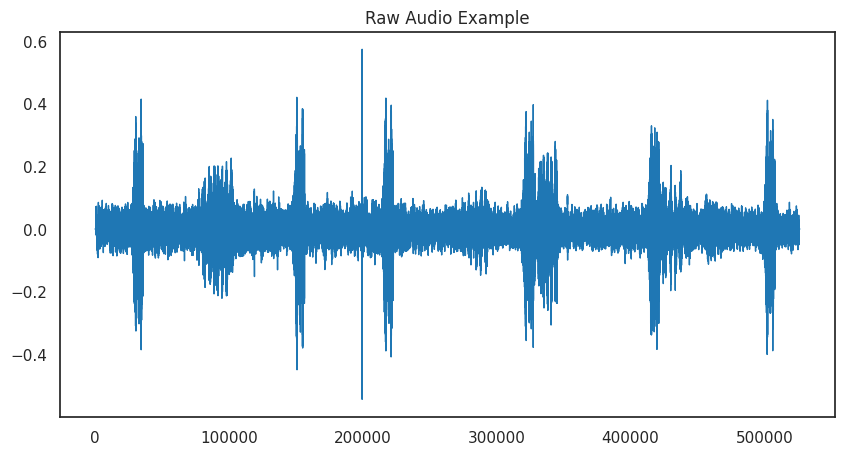

In [11]:
# pd serie is a list with index
pd.Series(y).plot(figsize=(10, 5), 
                  lw=1, 
                  title='Raw Audio Example',
                  color=color_pal[0]) # panda serie
plt.show()

Trim parts (ft of top_db parameter)

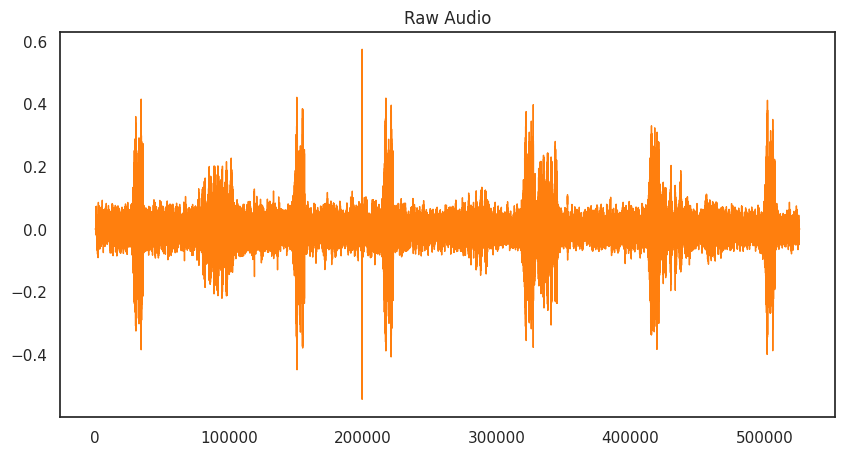

In [12]:
y_trimmed, _ = librosa.effects.trim(y, top_db=60) #with top_db = top decibel to trim
pd.Series(y_trimmed).plot(figsize=(10, 5), 
                  lw=1, 
                  title='Raw Audio',
                  color=color_pal[1]) # panda serie
plt.show()

Zoom on raw data

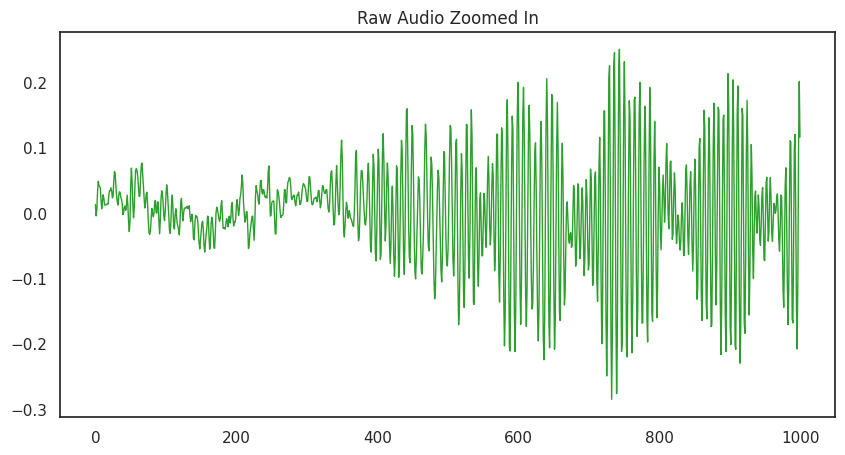

In [13]:
pd.Series(y[31500:32500]).plot(figsize=(10, 5), 
                  lw=1, 
                  title='Raw Audio Zoomed In',
                  color=color_pal[2]) # panda serie
plt.show()

### Spectrogram

In [14]:
import numpy as np
import librosa

def get_spectro(audio):
    audio, sr = librosa.load(audio)
    D = librosa.stft(audio) # see param
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    return S_db

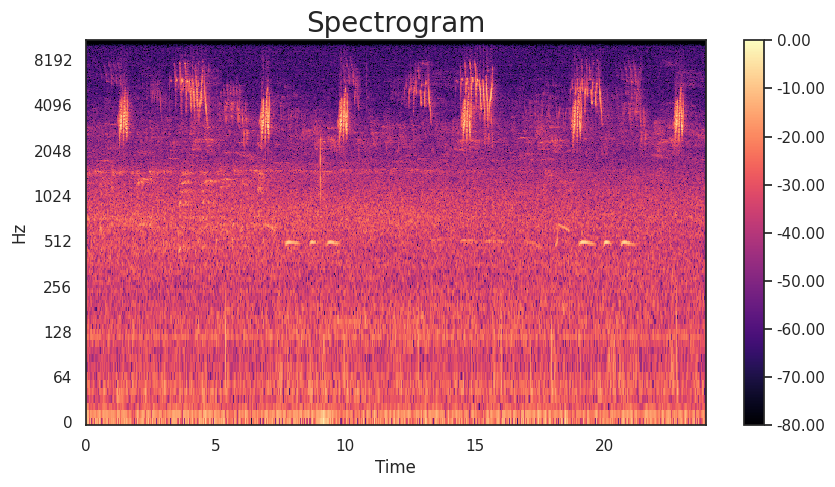

In [16]:
# Display Spectrogram

fig, ax = plt.subplots(figsize=(10,5))
S_db = get_spectro(audio_files[0])
img = librosa.display.specshow(S_db, 
                               x_axis='time', 
                               y_axis='log', 
                               ax=ax)
ax.set_title('Spectrogram', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f')
plt.show()

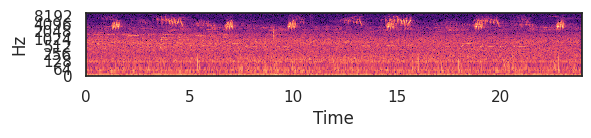

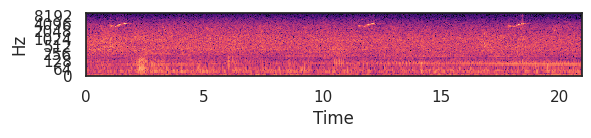

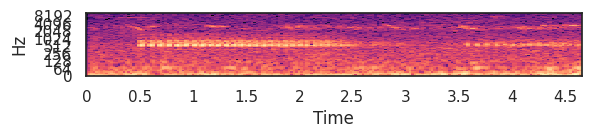

/home/max/.local/lib/python3.10/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


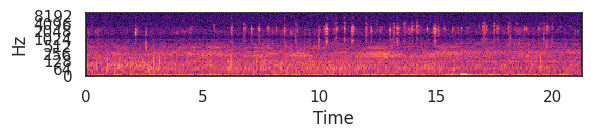

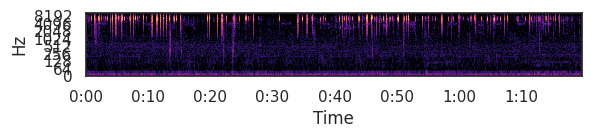

In [17]:
# Plot 5 premiers spectrograms
for i in range(1,6):
    plt.subplot(5, 1, i)
    librosa.display.specshow(get_spectro(audio_files[i-1]), 
                               x_axis='time', 
                               y_axis='log')
    plt.show()